In [1]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
import matplotlib.pyplot as plt

In [3]:
def euclidean_dist(vector1, vector2):
    shape_vec1 = vector1.shape
    shape_vec2 = vector2.shape
    if shape_vec1 != shape_vec2:
        return print("Vector dims not equal!")
    else:
        cvector1 = np.copy(vector1.reshape((np.amax(shape_vec1), 1)))
        cvector2 = np.copy(vector2.reshape((np.amax(shape_vec2), 1)))
    return np.linalg.norm(cvector1 - cvector2)

In [4]:
def cosine_sim(vector1, vector2):
    shape_vec1 = vector1.shape
    shape_vec2 = vector2.shape
    cvector1 = np.copy(vector1.reshape((1, np.amax(shape_vec1))))
    cvector2 = np.copy(vector2.reshape((np.amax(shape_vec2), 1)))
    cv1unit = cvector1 / np.linalg.norm(cvector1)
    cv2unit = cvector2 / np.linalg.norm(cvector2)
    return (np.dot(cv1unit, cv2unit))

In [5]:
def compute_dist(ndarray, function_to_use):
    distance_array = np.zeros((ndarray.shape[0], 1))
    mean_vector = np.mean(ndarray, axis = 0)
    col_mean_vector = mean_vector.reshape((mean_vector.shape[0], 1))
    for index in range(ndarray.shape[0]):
        distance_array[index] = function_to_use(ndarray[index].reshape(
        (ndarray[0].shape[0], 1)), col_mean_vector)
    return distance_array

In [6]:
cos_dist_matrix = compute_dist(iris['data'], cosine_sim)
euc_dist_matrix = compute_dist(iris['data'], euclidean_dist)

Text(0,0.5,'Probability Density')

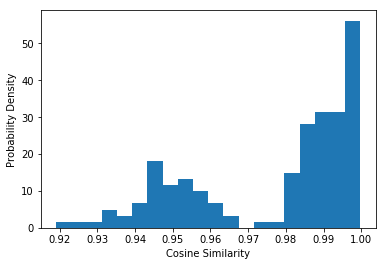

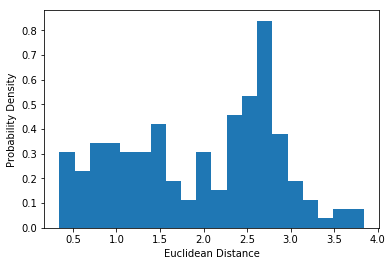

In [7]:
%matplotlib inline

fig1, ax1 = plt.subplots()
ax1.set_xlabel("Cosine Similarity")
ax1.set_ylabel("Probability Density")
ax1.hist(cos_dist_matrix, bins = 20, density = True)

fig2, ax2 = plt.subplots()
ax2.hist(euc_dist_matrix, bins = 20, density = True)
ax2.set_xlabel("Euclidean Distance")
ax2.set_ylabel("Probability Density")